In [264]:
import pandas as pd
import numpy as np
from random import sample
import matplotlib.pyplot as plt

In [265]:
#Definiremos funciones para poder mostrar siempre los datos ordenados por años
def order_by_year(fila: pd.Series):
    return fila['YEAR_PROCESO']

def revisar_ceros(dataframe: pd.DataFrame):
    cols_limpiar_ceros = ['puntaje_lectora', 'puntaje_m1', 'puntaje_historia', 'puntaje_ciencias', 'promedio_notas', 'puntaje_nem']
    
    
    for columna in cols_limpiar_ceros:
        conteo_ceros = (dataframe[columna] == 0).sum()
        
        hay_ceros = (dataframe[columna] == 0).any()
        
        if hay_ceros:
            print(f"Columna '{columna}': Hay {conteo_ceros} valores iguales a cero.")
        else:
            print(f"Columna '{columna}': No hay valores iguales a cero.")

In [266]:
#modifique los años respectivos para mi caso
archivos_demre = {
    2004: '1QmT7MrhT5elmBxwFnHTRxvDo-WnxSqLk',
    2005: '1L37Qs37HYCSPqNiK_AysSZ5-1ee20XB3',
    2006: '17T1xKGUGQCdD5ImdJ4xsuS4WcWFbZ487',
    2007: '1dTfZEoOGElv8ADnLxgG0CXiP_P1Tbn2n',
    2008: '1cVDazftOBixjRVEjIMz72SobVH_JZ9af',
    2009: '1FLU5pj56v9Hin2nZ714BDkHP2BNCv0uK',
    2010: '1gQOioZY8rYHJ067O4rOE6YuUC_OwxGH0',
    2011: '1k7gR9WjHgAz6BIQ02hsPOoe0nyuH7cW3',
}

lista_de_dataframes = []

print("Iniciando proceso de unificación...")

# Usamos un bucle para recorrer cada año y cada ID en nuestro diccionario.
for year_proceso, file_id in archivos_demre.items():
    try:
        # Construimos la URL de descarga para el archivo actual
        url = f'https://drive.google.com/uc?export=download&id={file_id}'

        # Leemos el CSV desde la URL
        print(f"-> Cargando datos del año {year_proceso}...")
        df_temporal = pd.read_csv(url, sep=';')

        # ¡Este es el paso clave! Creamos una nueva columna con el año.
        df_temporal['YEAR_PROCESO'] = year_proceso

        # Agregamos el DataFrame de este año a nuestra lista.
        lista_de_dataframes.append(df_temporal)
        print(f"   ...Datos del año {year_proceso} cargados con éxito.")

    except Exception as e:
        print(f"   !!! Error al cargar el año {year_proceso}: {e}")


Iniciando proceso de unificación...
-> Cargando datos del año 2004...
   ...Datos del año 2004 cargados con éxito.
-> Cargando datos del año 2005...
   ...Datos del año 2005 cargados con éxito.
-> Cargando datos del año 2006...
   ...Datos del año 2006 cargados con éxito.
-> Cargando datos del año 2007...
   ...Datos del año 2007 cargados con éxito.
-> Cargando datos del año 2008...
   ...Datos del año 2008 cargados con éxito.
-> Cargando datos del año 2009...
   ...Datos del año 2009 cargados con éxito.
-> Cargando datos del año 2010...
   ...Datos del año 2010 cargados con éxito.
-> Cargando datos del año 2011...
   ...Datos del año 2011 cargados con éxito.


In [267]:
display(lista_de_dataframes[1].head())
display(lista_de_dataframes[-1].head())

,ID_aux,GRUPO_DEPENDENCIA,RAMA,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,LENG_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,PROM_NOTAS,PTJE_NEM,YEAR_PROCESO
0,id_0000900970054,1,H2,5,13,13101.0,589,569,0,457,57,561,2005
1,id_0006900370628,2,T2,1,5,5501.0,449,497,0,446,54,499,2005
2,id_0009900270955,1,H2,1,13,13123.0,361,405,350,0,49,400,2005
3,id_0009900270956,2,T1,1,13,13127.0,490,470,574,0,61,641,2005
4,id_0009900270976,3,T3,1,13,13126.0,422,450,469,0,53,478,2005


,ID_aux,RBD,GRUPO_DEPENDENCIA,RAMA,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,LENG_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,MODULO_ACTUAL,PROM_NOTAS,PTJE_NEM,YEAR_PROCESO
0,id_0000900270006,45,2,H1,1,15,15101.0,591,480,552,0,NaN,62,661,2011
1,id_0000900470063,8680,2,H1,5,13,13101.0,591,633,0,554,BIO,57,558,2011
2,id_0000900570041,8822,3,H1,1,13,13114.0,450,459,0,0,NaN,50,414,2011
3,id_0000900970045,8352,3,T1,1,11,11101.0,403,417,328,0,NaN,50,417,2011
4,id_0001900070107,22750,2,T3,1,14,14108.0,537,490,601,0,NaN,53,478,2011


In [268]:
columnas = [
    'ID_aux',
    'RBD',
    'GRUPO_DEPENDENCIA',
    'RAMA_EDUCACIONAL',
    'SITUACION_EGRESO',
    'CODIGO_REGION',
    'CODIGO_COMUNA',
    'PROMEDIO_NOTAS',
    'PTJE_NEM',
    'PTJE_RANKING',
    'LENG_ACTUAL',
    'MATE_ACTUAL',
    'HCSO_ACTUAL',
    'CIEN_ACTUAL',
    'year_proceso'
]

In [269]:
l_columnas_df = []

for i, df in enumerate(lista_de_dataframes, start=1):
    año_proceso = int(df['YEAR_PROCESO'].iloc[0])
    
    # 2. Obtener la lista completa de nombres de columna (incluyendo 'year_proceso')
    lista_de_nombres_columna = df.columns.tolist()

    #Construir el resultado en la forma deseada [año, [col1, col2, ...]]
    # Usaremos una tupla (inmutable) ya que es un buen formato para un par clave-valor.
    resultado_par = (año_proceso, lista_de_nombres_columna)
    
    print(f"- {i}.", f"({len(df.columns)} columnas)" , resultado_par) # Muestra el resultado final de cada DF
    l_columnas_df.append(resultado_par)

#print(l_columnas_df)

- 1. (13 columnas) (2004, ['ID_aux', 'GRUPO_DEPENDENCIA', 'RAMA', 'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL', 'PROM_NOTAS', 'PTJE_NEM', 'YEAR_PROCESO'])
- 2. (13 columnas) (2005, ['ID_aux', 'GRUPO_DEPENDENCIA', 'RAMA', 'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL', 'PROM_NOTAS', 'PTJE_NEM', 'YEAR_PROCESO'])
- 3. (13 columnas) (2006, ['ID_aux', 'GRUPO_DEPENDENCIA', 'RAMA', 'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL', 'PROM_NOTAS', 'PTJE_NEM', 'YEAR_PROCESO'])
- 4. (13 columnas) (2007, ['ID_aux', 'GRUPO_DEPENDENCIA', 'RAMA', 'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL', 'PROM_NOTAS', 'PTJE_NEM', 'YEAR_PROCESO'])
- 5. (13 columnas) (2008, ['ID_aux', 'GRUPO_DEPENDENCIA', 'RAMA', 'SITUACION_EGRESO', 'CODIGO_REGION', 'CODI

Notemos que en el año 2010 y 2011 existen las columnas RDB, y MODULO_ACTUAL. Mientras que en los otros no, por lo que veremos el contenido de dichas columnas.

In [270]:
df_2011 = lista_de_dataframes[-1]
display(df_2011.head(10))
"""
df_2011_filtrado = df_2011[df_2011['MODULO_ACTUAL'].notna() & (df_2011['MODULO_ACTUAL'] != 'BIO')]
print(f"Filas encontradas: {len(df_2011_filtrado)}")
display(df_2011_filtrado.head(50))  # ajustar número de filas a mostrar según convenga
print("Valores únicos restantes en MODULO_ACTUAL:", df_2011_filtrado['MODULO_ACTUAL'].unique())
"""

,ID_aux,RBD,GRUPO_DEPENDENCIA,RAMA,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,LENG_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,MODULO_ACTUAL,PROM_NOTAS,PTJE_NEM,YEAR_PROCESO
0,id_0000900270006,45,2,H1,1,15,15101.0,591,480,552,0,NaN,62,661,2011
1,id_0000900470063,8680,2,H1,5,13,13101.0,591,633,0,554,BIO,57,558,2011
2,id_0000900570041,8822,3,H1,1,13,13114.0,450,459,0,0,NaN,50,414,2011
3,id_0000900970045,8352,3,T1,1,11,11101.0,403,417,328,0,NaN,50,417,2011
4,id_0001900070107,22750,2,T3,1,14,14108.0,537,490,601,0,NaN,53,478,2011
5,id_0001900070123,22518,2,T1,1,14,14202.0,279,283,0,0,NaN,0,0,2011
6,id_0001900170123,25182,3,H1,1,13,13125.0,443,459,0,391,BIO,49,393,2011
7,id_0001900470136,40311,2,H2,1,12,12301.0,375,497,0,348,QUI,52,460,2011
8,id_0001900570111,253,2,H1,1,2,2201.0,403,432,513,0,NaN,55,517,2011
9,id_0001900570117,253,2,H1,1,2,2201.0,502,497,0,468,FIS,61,641,2011


'\ndf_2011_filtrado = df_2011[df_2011[\'MODULO_ACTUAL\'].notna() & (df_2011[\'MODULO_ACTUAL\'] != \'BIO\')]\nprint(f"Filas encontradas: {len(df_2011_filtrado)}")\ndisplay(df_2011_filtrado.head(50))  # ajustar número de filas a mostrar según convenga\nprint("Valores únicos restantes en MODULO_ACTUAL:", df_2011_filtrado[\'MODULO_ACTUAL\'].unique())\n'

Notemos que `RBD` y `MODULO_ACTUAL` son el **Rol Base de Datos** y la **mención de ciencias** que se rindió, respectivamente. Como los años anteriores no tienen esas columnas, para similitud de estas, se les agregarán a los años faltantes.

In [271]:
col_faltantes = ['RBD', 'MODULO_ACTUAL']
for df in (lista_de_dataframes[:-2]):
    for i, columna in enumerate(col_faltantes, start=1):
        if i == 1:
            posicion = df.columns.get_loc('ID_aux') + 1
        else:
            posicion = df.columns.get_loc('CIEN_ACTUAL') + 1
        
        df.insert(loc=posicion, column=columna, value=pd.NA)

for i, df in enumerate(lista_de_dataframes):
    print(f"- {i}.", f"({len(df.columns)} columnas)")

- 0. (15 columnas)
- 1. (15 columnas)
- 2. (15 columnas)
- 3. (15 columnas)
- 4. (15 columnas)
- 5. (15 columnas)
- 6. (15 columnas)
- 7. (15 columnas)


Ahora que todos los dataframes tienen las mismas columnas, los unimos via `pd.concat` para facilitar la limpieza de las columnas (nos evitamos hacer un año a año)

In [272]:
#Generamos claridad en los nombres de las columnas
for df in lista_de_dataframes:
    if "RAMA" in df.columns:
        df.rename(columns={"RAMA" : "RAMA_EDUCACIONAL"}, inplace=True)
    if "PROM_NOTAS" in df.columns:
        df.rename(columns={"PROM_NOTAS" : "PROMEDIO_NOTAS"}, inplace=True)

In [273]:
df_unificado = pd.concat(lista_de_dataframes, ignore_index=True)
df_unificado.info()
#muestra_random = sorted(df_unificado.sample(10), key=order_by_year)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681245 entries, 0 to 1681244
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ID_aux             1681245 non-null  object 
 1   RBD                505638 non-null   object 
 2   GRUPO_DEPENDENCIA  1681245 non-null  int64  
 3   RAMA_EDUCACIONAL   1676957 non-null  object 
 4   SITUACION_EGRESO   1681245 non-null  int64  
 5   CODIGO_REGION      1681245 non-null  int64  
 6   CODIGO_COMUNA      1655129 non-null  float64
 7   LENG_ACTUAL        1681245 non-null  int64  
 8   MATE_ACTUAL        1681245 non-null  int64  
 9   HCSO_ACTUAL        1681245 non-null  int64  
 10  CIEN_ACTUAL        1681245 non-null  int64  
 11  MODULO_ACTUAL      281847 non-null   object 
 12  PROMEDIO_NOTAS     1681245 non-null  int64  
 13  PTJE_NEM           1681245 non-null  int64  
 14  YEAR_PROCESO       1681245 non-null  int64  
dtypes: float64(1), int64(10), object

In [274]:
#Limpiamos datos y generamos columnas categoricas para eficiencia de memoria
col_category = ['RBD', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL',
            'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA']

for columna in col_category:
    if columna in df_unificado.columns:
        df_unificado[columna] = df_unificado[columna].astype('category')

print("Columnas convertidas a 'category':", [c for c in col_category if c in df_unificado.columns])
df_unificado.info()

Columnas convertidas a 'category': ['RBD', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL', 'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681245 entries, 0 to 1681244
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   ID_aux             1681245 non-null  object  
 1   RBD                505638 non-null   category
 2   GRUPO_DEPENDENCIA  1681245 non-null  category
 3   RAMA_EDUCACIONAL   1676957 non-null  category
 4   SITUACION_EGRESO   1681245 non-null  category
 5   CODIGO_REGION      1681245 non-null  category
 6   CODIGO_COMUNA      1655129 non-null  category
 7   LENG_ACTUAL        1681245 non-null  int64   
 8   MATE_ACTUAL        1681245 non-null  int64   
 9   HCSO_ACTUAL        1681245 non-null  int64   
 10  CIEN_ACTUAL        1681245 non-null  int64   
 11  MODULO_ACTUAL      281847 non-null   object  
 12  PROMEDIO_NOTAS     1681245 non

In [275]:
mapa_renombre = {
        'ID_aux': 'id_estudiante',
        'RBD': 'id_colegio_rbd',
        'GRUPO_DEPENDENCIA': 'dependencia_colegio',
        'RAMA_EDUCACIONAL': 'rama_educacional',
        'SITUACION_EGRESO': 'situacion_egreso',
        'CODIGO_REGION': 'cod_region',
        'CODIGO_COMUNA': 'cod_comuna',
        'PROMEDIO_NOTAS': 'promedio_notas',
        'PTJE_NEM': 'puntaje_nem',
        'PTJE_RANKING': 'puntaje_ranking',
        'LENG_ACTUAL': 'puntaje_lectora',
        'CLEC_ACTUAL': 'puntaje_lectora',
        'CLEC_REG_ACTUAL': 'puntaje_lectora',
        'MATE_ACTUAL': 'puntaje_m1',
        'MATE1_REG_ACTUAL': 'puntaje_m1',
        'MATE2_REG_ACTUAL': 'puntaje_m2',
        'HCSO_ACTUAL': 'puntaje_historia',
        'HCSOC_REG_ACTUAL': 'puntaje_historia',
        'CIEN_ACTUAL': 'puntaje_ciencias',
        'CIEN_REG_ACTUAL': 'puntaje_ciencias',
        'MODULO_ACTUAL': 'tipo_ciencia',
        'MODULO_REG_ACTUAL': 'tipo_ciencia',
        'YEAR_PROCESO': 'year_proceso'
    }

    #Aplicamos el nuevo nombre de las columnas
df_unificado.rename(columns=mapa_renombre, inplace=True)

Como hay varios datos con **valores 0**, los llevaremos a `NaN` dado que esos valores afectarían medidas estadísticas

In [276]:
revisar_ceros(df_unificado)

Columna 'puntaje_lectora': Hay 1943 valores iguales a cero.
Columna 'puntaje_m1': Hay 9569 valores iguales a cero.
Columna 'puntaje_historia': Hay 603517 valores iguales a cero.
Columna 'puntaje_ciencias': Hay 749109 valores iguales a cero.
Columna 'promedio_notas': Hay 27344 valores iguales a cero.
Columna 'puntaje_nem': Hay 27414 valores iguales a cero.


In [277]:
df_clean = pd.DataFrame(df_unificado)
col_numericas_limpiar = ['puntaje_lectora', 'puntaje_m1', 'puntaje_historia', 'puntaje_ciencias', 'promedio_notas', 'puntaje_nem']
for columna in col_numericas_limpiar:
    df_clean[columna] = df_unificado[columna].replace(0, np.nan)

revisar_ceros(df_clean)

Columna 'puntaje_lectora': No hay valores iguales a cero.
Columna 'puntaje_m1': No hay valores iguales a cero.
Columna 'puntaje_historia': No hay valores iguales a cero.
Columna 'puntaje_ciencias': No hay valores iguales a cero.
Columna 'promedio_notas': No hay valores iguales a cero.
Columna 'puntaje_nem': No hay valores iguales a cero.


In [278]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681245 entries, 0 to 1681244
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   id_estudiante        1681245 non-null  object  
 1   id_colegio_rbd       505638 non-null   category
 2   dependencia_colegio  1681245 non-null  category
 3   rama_educacional     1676957 non-null  category
 4   situacion_egreso     1681245 non-null  category
 5   cod_region           1681245 non-null  category
 6   cod_comuna           1655129 non-null  category
 7   puntaje_lectora      1679302 non-null  float64 
 8   puntaje_m1           1671676 non-null  float64 
 9   puntaje_historia     1077728 non-null  float64 
 10  puntaje_ciencias     932136 non-null   float64 
 11  tipo_ciencia         281847 non-null   object  
 12  promedio_notas       1653901 non-null  float64 
 13  puntaje_nem          1653831 non-null  float64 
 14  year_proceso         1681245 non-n

In [279]:
muestra = df_clean.sample(10)
print(type(muestra))
display(muestra.sort_values(by='year_proceso'))

<class 'pandas.core.frame.DataFrame'>


,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,tipo_ciencia,promedio_notas,puntaje_nem,year_proceso
55614,id_2864928976412,NaN,2,H1,1,13,605.0,600.0,425.0,527.0,NaN,NaN,52.0,455.0,2004
66566,id_2909929670983,NaN,3,T3,1,13,605.0,391.0,442.0,492.0,NaN,NaN,61.0,641.0,2004
281938,id_2950929575052,NaN,2,H1,1,4,4102.0,402.0,378.0,462.0,NaN,NaN,54.0,496.0,2005
400008,id_2336923473659,NaN,2,H1,1,5,5601.0,607.0,640.0,NaN,565.0,NaN,67.0,764.0,2006
468023,id_2792927379235,NaN,1,H1,1,13,13123.0,664.0,652.0,690.0,NaN,NaN,66.0,744.0,2006
498984,id_7717977271718,NaN,3,H2,1,5,5301.0,282.0,285.0,382.0,199.0,NaN,46.0,339.0,2006
1000612,id_3170931177002,NaN,2,T3,1,13,13125.0,358.0,425.0,432.0,NaN,NaN,48.0,376.0,2009
1023087,id_3244932974443,NaN,3,H1,1,8,8102.0,403.0,438.0,417.0,293.0,NaN,51.0,435.0,2009
1392445,id_3677936877768,10717,2,T3,1,13,13601.0,244.0,437.0,296.0,NaN,NaN,52.0,458.0,2010
1533492,id_0847908574790,8888,1,H1,1,13,13114.0,733.0,772.0,646.0,NaN,NaN,65.0,723.0,2011


In [280]:
df_descrip = df_clean.groupby('year_proceso').describe()
print("\nDescripción de puntaje_lectora en los años a estudio:")
display(df_descrip['puntaje_lectora'])
print("\nDescripción de puntaje_m1 en los años a estudio:")
display(df_descrip['puntaje_m1'])
print("\nDescripción de puntaje_ciencias en los años a estudio:")
display(df_descrip['puntaje_ciencias'])



Descripción de puntaje_lectora en los años a estudio:


,count,mean,std,min,25%,50%,75%,max
year_proceso,,,,,,,,
2004,153851.0,500.725156,121.821156,175.0,407.0,492.0,592.0,840.0
2005,169779.0,500.046348,109.245442,150.0,422.0,502.0,575.0,850.0
2006,176642.0,500.046116,109.090113,150.0,426.0,499.0,574.0,850.0
2007,212591.0,499.972426,109.230242,150.0,422.0,499.0,576.0,850.0
2008,217991.0,500.005051,109.316234,150.0,426.0,502.0,574.0,850.0
2009,243465.0,500.062798,109.201997,150.0,425.0,501.0,575.0,850.0
2010,252884.0,500.035056,109.133215,150.0,425.0,498.0,576.0,850.0
2011,252099.0,500.406753,108.559445,150.0,428.0,502.0,574.0,850.0



Descripción de puntaje_m1 en los años a estudio:


,count,mean,std,min,25%,50%,75%,max
year_proceso,,,,,,,,
2004,153359.0,499.962154,109.442313,112.0,425.0,502.0,570.0,840.0
2005,169356.0,500.555782,110.145174,150.0,426.0,502.0,572.0,850.0
2006,176325.0,500.581613,110.249003,150.0,429.0,499.0,572.0,850.0
2007,211389.0,500.251697,109.565931,150.0,428.0,501.0,574.0,850.0
2008,217001.0,500.327542,109.891598,150.0,421.0,499.0,574.0,850.0
2009,242328.0,500.125413,109.623662,150.0,425.0,498.0,574.0,850.0
2010,251399.0,500.787008,110.790457,150.0,424.0,497.0,576.0,850.0
2011,250519.0,501.072893,111.298545,150.0,432.0,497.0,573.0,850.0



Descripción de puntaje_ciencias en los años a estudio:


,count,mean,std,min,25%,50%,75%,max
year_proceso,,,,,,,,
2004,84158.0,500.519808,99.775653,130.0,432.0,502.0,569.0,835.0
2005,94074.0,500.092066,109.282457,150.0,419.0,496.0,576.0,850.0
2006,99462.0,500.143603,109.215319,150.0,424.0,501.0,574.0,850.0
2007,113476.0,500.112658,109.238049,150.0,428.0,497.0,575.0,850.0
2008,120605.0,499.994237,109.552307,150.0,420.0,502.0,572.0,850.0
2009,138514.0,500.128767,109.337120,150.0,425.0,501.0,573.0,850.0
2010,141730.0,500.210718,109.220615,150.0,430.0,498.0,573.0,850.0
2011,140117.0,500.238651,109.549556,150.0,427.0,503.0,574.0,850.0


In [281]:
df_clean.to_parquet('../datos_procesados_04-11.parquet')

In [282]:


def graficar_promedio_columna(df_descrip: pd.DataFrame, columna):
    df_serie_mean = df_descrip.loc[:, (columna, 'mean')]

    #Convertir el índice (YEAR_PROCESO) a INT para un eje X correcto
    df_serie_mean.index = df_serie_mean.index.values.astype(int)

    #Asignamos un color para el grafico
    if columna == 'puntaje_lectora':
        color = 'Red'
        nombre_prueba = 'Lenguaje'

    elif columna == 'puntaje_m1':
        color = 'Blue'
        nombre_prueba = 'Matemáticas'

    elif columna == 'puntaje_historia':
        color = 'Orange'
        nombre_prueba = 'Historia'

    elif columna == 'puntaje_ciencias':
        color = 'Green'
        nombre_prueba = 'Ciencias'
    
    plt.figure(figsize=(10, 6))

    #Usamos el método .plot() sobre la Serie de pandas
    df_serie_mean.plot(kind='line', marker='o', color=color)

    #Seteamos ejer y titulos
    plt.title(f'Evolución del Puntaje Promedio para PSU de {nombre_prueba}', fontsize=15)
    plt.xlabel('Año del Proceso', fontsize=12)
    plt.ylabel('Puntaje Promedio (Escala 100-850)', fontsize=12)
    
    # Ajustar el límite Y para magnificar la tendencia (ajustar según el rango de la prueba)
    plt.ylim(df_serie_mean.min() - 5, df_serie_mean.max() + 5)
    
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.xticks(df_serie_mean.index.values)
    plt.tight_layout()
    plt.show()

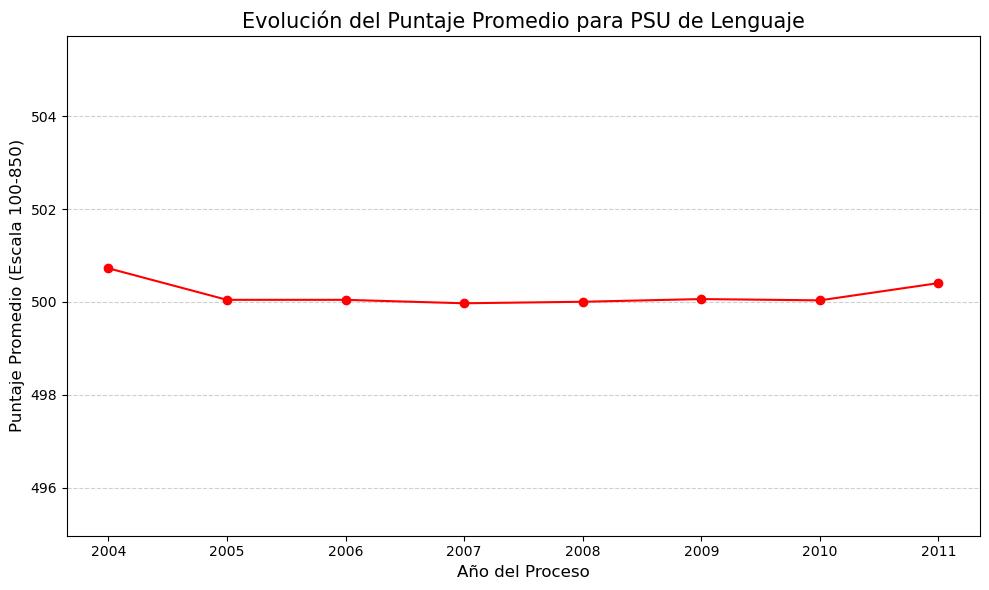

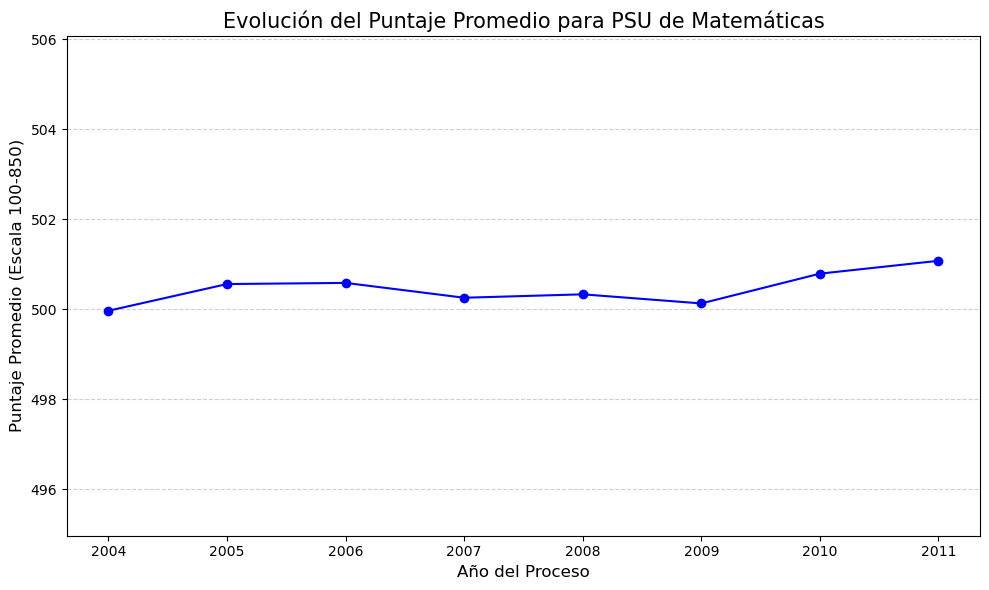

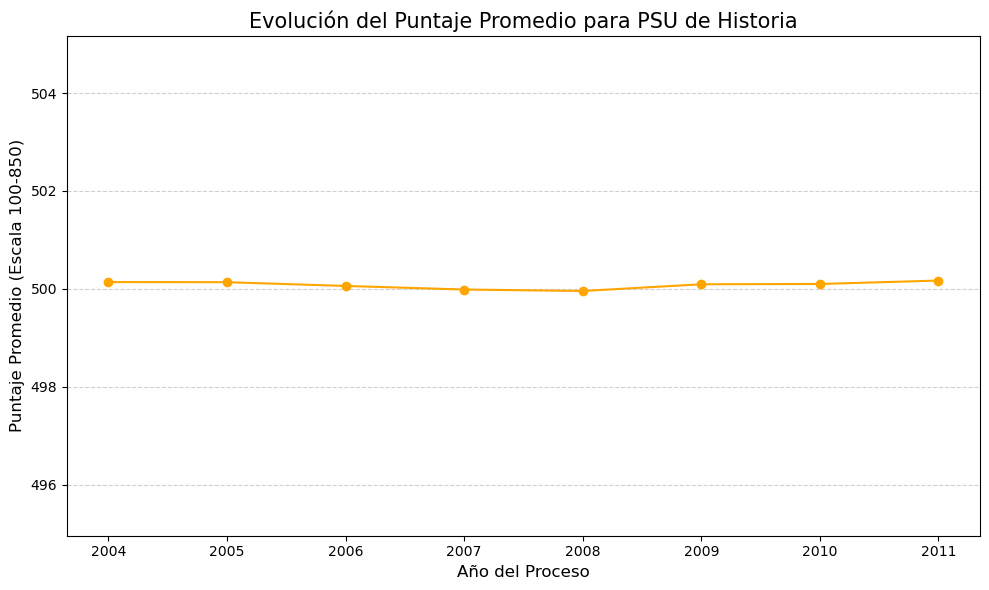

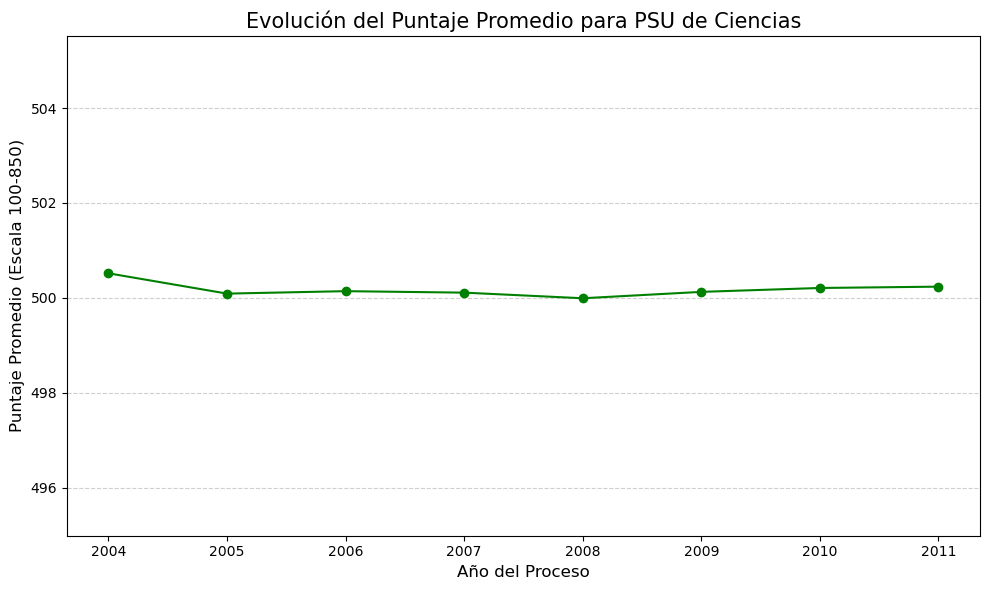

In [283]:
pruebas_a_graficar = ['puntaje_lectora', 'puntaje_m1', 'puntaje_historia', 'puntaje_ciencias']
for prueba in pruebas_a_graficar:
    graficar_promedio_columna(df_descrip, prueba)

Se corrobora lo establecido el en `README.md` (sobre la estandarización de puntajes). Con el fin de poder desarrollar análisis que cumplan con los objetivos de nuestro proyecto, se establecerán los puntos claves para determinar diferencias entre los años en estudio.